In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def sign(t):
    return (-1)**(t < 0)


def Perceptron(X, y, ln=0.001, iters=1000):    
    theta = np.random.randn(len(X[0]))

    for i in range(iters):
        y_predicted = sign(X @ theta)

        # converge, all points are classified correctly
        if np.all(y == y_predicted):
            print('break')
            break
        
        for i in range(len(X)):
            if (y[i] * sign(X[i] @ theta)) < 0:
                theta += ln * y[i] * X[i]

    return theta


In [3]:
# calculating the percentage of correctly classified example
def percentageOfCorrect(inputs, targets, w):
    N = len(targets)
    num = 0

    for n in range(N):
        point = inputs[n]

        if (targets[n] * (point @ w)) > 0:
            num += 1

    return num / N * 100

# step 1: Generating 100 smaples from two bi-variate Gaussian densities
# covariance
C = np.array([ [2, 1], [1, 2]])
A = np.linalg.cholesky(C)

# the mean
m1 = np.array([[0, 5]])
m2 = np.array([[5, 0]])
# m1 = np.array([[ 2.5, 2.5 ]])
# m2 = np.array([[ 10, 10 ]])

# another group of the mean
m11 = np.array( [[ 2.5, 2.5 ]])
m21 = np.array([[10, 10]])

# sampling without bias
NumDataPerClass = 200

U1 = np.random.randn(NumDataPerClass, 2)
X1 = A @ U1.T + m1.T

U2 = np.random.randn(NumDataPerClass, 2)
X2 = A @ U2.T + m2.T

# another sampling with bias
X11 = A @ U1.T + m11.T
X22 = A @ U2.T + m21.T



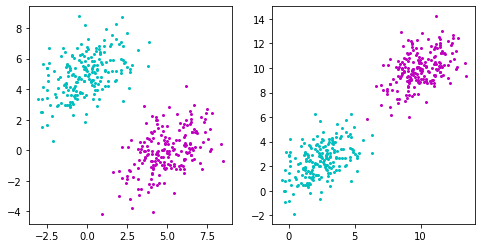

In [4]:
# plot the distribution of the data
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(X1[0], X1[1], c="c", s=4)
ax[0].scatter(X2[0], X2[1], c="m", s=4)

ax[1].scatter(X11[0], X11[1], c="c", s=4)
ax[1].scatter(X22[0], X22[1], c="m", s=4)


In [5]:
# step 2: rearrange data

X = np.concatenate((X1, X2), axis=1).T
print('X.shape: ', X.shape)

labelPos = np.ones(NumDataPerClass)
labelNeg = -1 * np.ones(NumDataPerClass)
y = np.concatenate((labelPos, labelNeg))
print('y.shape: ', y.shape)

# with bias
X_B = np.concatenate((X11, X22), axis=1)
B = np.ones((2 * NumDataPerClass, 1))
# B = np.zeros((2 * NumDataPerClass, 1)) # hack for the case of 'no bias'
# (x11, x12, b), (x21, x22, b)...
X_B = np.append(X_B.T, B, axis=1)
print('X_B.shape', X_B.shape)


X.shape:  (400, 2)
y.shape:  (400,)
X_B.shape (400, 3)


In [6]:
# Step3: Partitioning the data into training and test sets
rIndex = np.random.permutation(2 * NumDataPerClass)
Ntest = Ntrain = NumDataPerClass

yr = y[rIndex]
y_train = yr[:NumDataPerClass]
y_test = yr[NumDataPerClass:]

Xr = X[rIndex]
X_train = Xr[:NumDataPerClass]
X_test = Xr[NumDataPerClass:]

XBr = X_B[rIndex]
XB_train = XBr[:NumDataPerClass]
XB_test = XBr[NumDataPerClass:]


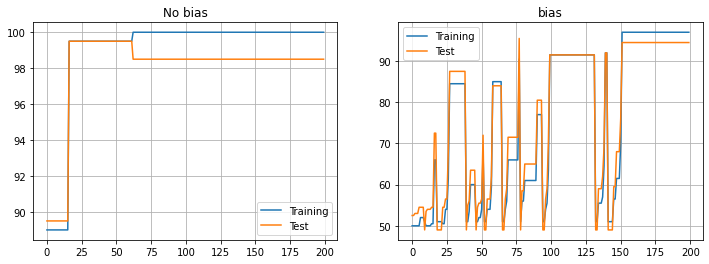

In [9]:
# Step 4: learning process
w = np.zeros(2)
wb = np.zeros(3)
alpha = 0.0035

MaxIter = 200
P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)
PB_train = np.zeros(MaxIter)
PB_test = np.zeros(MaxIter)

for i in range(MaxIter):
    j = np.floor(np.random.rand() * Ntrain).astype(int)

    x = X_train[j]
    xb = XB_train[j]
    y = y_train[j]

    if (y * (x @ w)) <= 0:
        w += alpha * y * x

    if (y * (xb @ wb)) <= 0:
        wb += alpha * y * xb

    P_train[i] = percentageOfCorrect(X_train, y_train, w)
    P_test[i] = percentageOfCorrect(X_test, y_test, w)

    PB_train[i] = percentageOfCorrect(XB_train, y_train, wb)
    PB_test[i] = percentageOfCorrect(XB_test, y_test, wb)

# ploting
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(range(MaxIter), P_train, label="Training")
ax[0].plot(range(MaxIter), P_test, label="Test")
ax[0].grid(True)
ax[0].set_title('No bias')
ax[0].legend()

ax[1].plot(range(MaxIter), PB_train, label="Training")
ax[1].plot(range(MaxIter), PB_test, label="Test")
ax[1].grid(True)
ax[1].set_title('bias')
ax[1].legend()


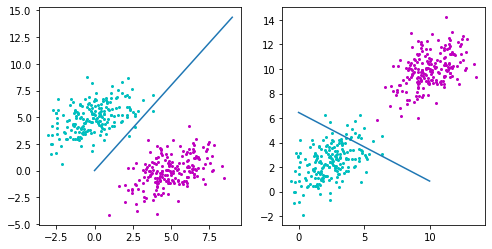

In [10]:
# Step 7: Draw a straight line
# plot the distribution of the data
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

xaxis = np.arange(0, 10, 1)
ax[0].scatter(X1[0], X1[1], c="c", s=4)
ax[0].scatter(X2[0], X2[1], c="m", s=4)
ax[0].plot(xaxis, -w[0]* xaxis / w[1])

xbaxis = np.arange(0, 10, 0.05)
ax[1].scatter(X11[0], X11[1], c="c", s=4)
ax[1].scatter(X22[0], X22[1], c="m", s=4)
ax[1].plot(xbaxis, (-wb[0] * xbaxis - wb[2]) / wb[1])
